In [1]:
%matplotlib inline 

import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/match.csv')
df

,P,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11
0,P1,0,1,1,1,0,0,0,0,0,2,0
1,P2,9,0,27,0,0,30,0,0,0,0,0
2,P3,8,15,0,0,12,18,0,16,0,0,0
3,P4,3,8,0,0,0,8,5,3,0,0,0
4,P5,2,0,8,0,0,21,0,10,0,7,0
5,P6,0,0,4,8,4,0,0,12,8,14,9
6,P7,0,4,0,3,0,8,0,0,10,11,9
7,P8,0,0,4,0,3,5,0,0,12,14,9
8,P9,0,0,0,0,0,1,2,2,0,8,5
9,P10,0,3,0,0,0,6,0,7,11,0,11


In [3]:
players = list(df.columns[1:])
players

['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11']

In [4]:
G = nx.DiGraph()

In [5]:
for index, row in df.iterrows():
    for player in players:
        G.add_edge(row['P'], player , weight=row[player])

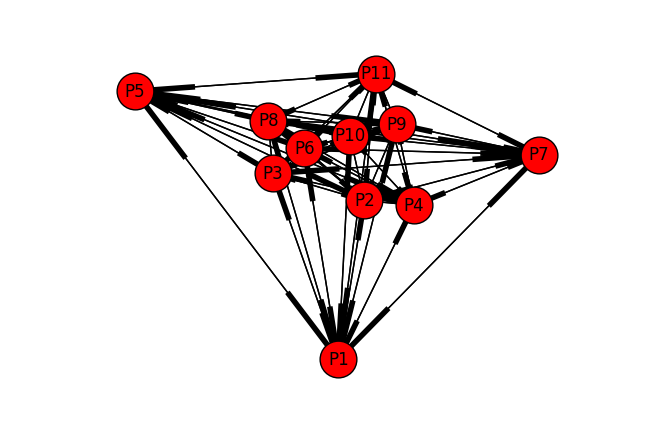

In [6]:
nx.draw(G, with_labels = True, node_size=700)
plt.show()

In [7]:
pr = nx.pagerank(G)
repr(pr)

"{'P6': 0.12820995476846755, 'P3': 0.06993897259385073, 'P10': 0.19282271723141434, 'P7': 0.031966532947350045, 'P2': 0.056399846664311776, 'P5': 0.052412218667095625, 'P9': 0.13455937308115515, 'P4': 0.03571494488537097, 'P1': 0.03229565789080632, 'P8': 0.1296650744308684, 'P11': 0.13601470683930905}"

In [8]:
kz = nx.katz_centrality_numpy(G)
repr(kz)

"{'P6': -0.43921996648282213, 'P3': -0.2413334086741917, 'P10': 0.3565378151170108, 'P7': 0.25098252160116735, 'P2': -0.0404811985864796, 'P5': -0.16566040411505775, 'P9': 0.5021181298625771, 'P4': -0.08995369747592762, 'P1': -0.09408225136635905, 'P8': -0.24796538438297763, 'P11': 0.4462038595884471}"

In [9]:
# Hand-made LTC values

LTC_P1=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P2=[1,2,3,4,6,7,10]
LTC_P3=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P4=[1,2,3,4,5,6,7,8]
LTC_P5=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P6=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P7=[2,4,6,7,9,10,11]
LTC_P8=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P9=[4,6,7,8,9,10,11]
LTC_P10=[1,2,3,4,5,6,7,8,9,10,11]
LTC_P11=[1,2,3,4,5,6,7,8,9,10,11]

ltc = {'P1':11,'P2':7,'P3':11,'P4':8,'P5':11,'P6':11,'P7':8,'P8':11,'P9':7,'P10':11,'P11':11}

In [10]:
to_dataframe = []
for player in players:
    list_attributes = []
    list_attributes.append(player)
    list_attributes.append(pr[player])
    list_attributes.append(kz[player])
    list_attributes.append(float(ltc[player])/len(players))
    to_dataframe.append(list_attributes)
    
print(to_dataframe)

[['P1', 0.03229565789080632, -0.09408225136635905, 1.0], ['P2', 0.056399846664311776, -0.0404811985864796, 0.6363636363636364], ['P3', 0.06993897259385073, -0.2413334086741917, 1.0], ['P4', 0.03571494488537097, -0.08995369747592762, 0.7272727272727273], ['P5', 0.052412218667095625, -0.16566040411505775, 1.0], ['P6', 0.12820995476846755, -0.43921996648282213, 1.0], ['P7', 0.031966532947350045, 0.25098252160116735, 0.7272727272727273], ['P8', 0.1296650744308684, -0.24796538438297763, 1.0], ['P9', 0.13455937308115515, 0.5021181298625771, 0.6363636363636364], ['P10', 0.19282271723141434, 0.3565378151170108, 1.0], ['P11', 0.13601470683930905, 0.4462038595884471, 1.0]]


In [11]:
df_centrality = pd.DataFrame(to_dataframe, columns=['node','pr','kz','ltc'])
df_centrality

,node,pr,kz,ltc
0,P1,0.032296,-0.094082,1.000000
1,P2,0.056400,-0.040481,0.636364
2,P3,0.069939,-0.241333,1.000000
3,P4,0.035715,-0.089954,0.727273
4,P5,0.052412,-0.165660,1.000000
5,P6,0.128210,-0.439220,1.000000
6,P7,0.031967,0.250983,0.727273
7,P8,0.129665,-0.247965,1.000000
8,P9,0.134559,0.502118,0.636364
9,P10,0.192823,0.356538,1.000000


In [12]:
df_centrality.corr()

,pr,kz,ltc
pr,1.000000,0.350870,0.309784
kz,0.350870,1.000000,-0.358373
ltc,0.309784,-0.358373,1.000000


In [13]:
df_centrality.corr(method='spearman')

,pr,kz,ltc
pr,1.000000,0.272727,0.243663
kz,0.272727,1.000000,-0.508513
ltc,0.243663,-0.508513,1.000000


In [14]:
df_centrality.corr(method='kendall')

,pr,kz,ltc
pr,1.000000,0.054545,0.190693
kz,0.054545,1.000000,-0.429058
ltc,0.190693,-0.429058,1.000000
